# Fruit Classification Problem

We will train various classfiers in Scikit Learn to distinguish between various kinds of fruits 
We will be using a simple dataset created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly.

This data set can be downloaded from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt

### Let's first import all required libraries and load the dataset from the github link

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
fruits_df = pd.read_csv('fruit_data_with_colors.txt', sep = '\t')
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Exploratory Data Analysis

In [31]:
fruits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [32]:
fruits_df.shape

(59, 7)

#### 59 Samples and 7 features in our dataset

In [33]:
fruits_df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


### Include the stats on non-numerical values in the dataset

In [34]:
fruits_df.describe(include=['object' , 'bool'])

,fruit_name,fruit_subtype
count,59,59
unique,4,10
top,orange,turkey_navel
freq,19,10


### Let's check the type of fruits available

In [35]:
fruits_df.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [36]:
fruits_df.fruit_name.value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

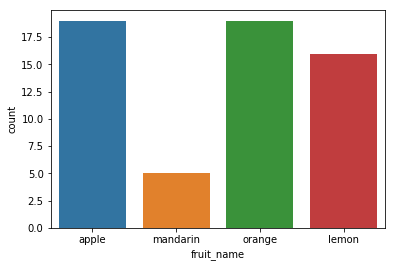

In [37]:
sns.countplot(fruits_df.fruit_name)

### Let's plot a heatmap and check the correlation among the features

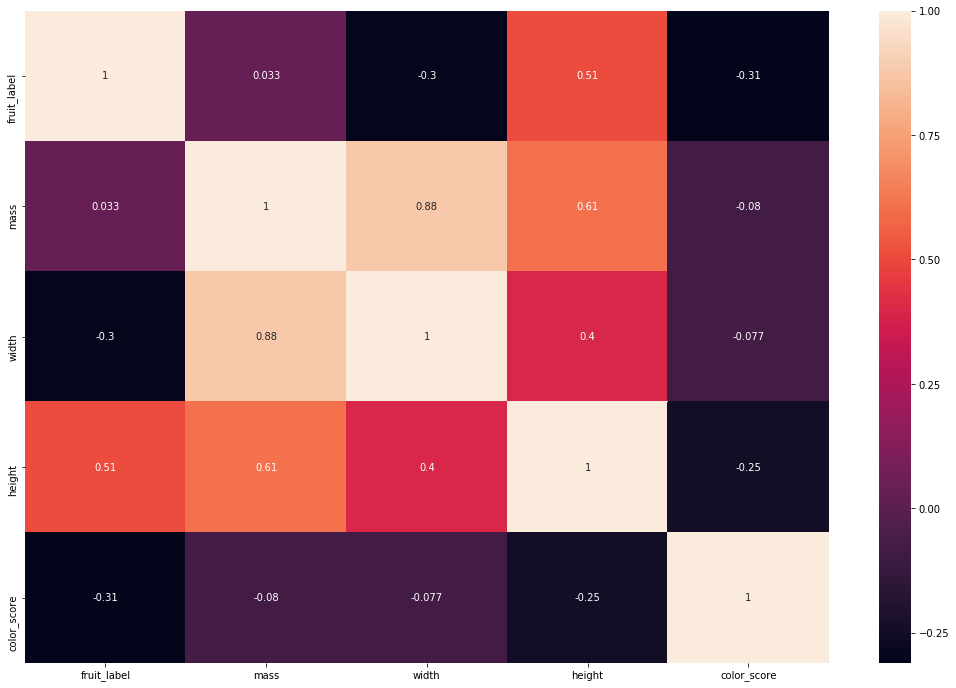

In [38]:
plt.figure(figsize=(18,12))
sns.heatmap(fruits_df.corr() , annot=True)

### Box Plot!

mass              AxesSubplot(0.125,0.536818;0.352273x0.343182)
width          AxesSubplot(0.547727,0.536818;0.352273x0.343182)
height               AxesSubplot(0.125,0.125;0.352273x0.343182)
color_score       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

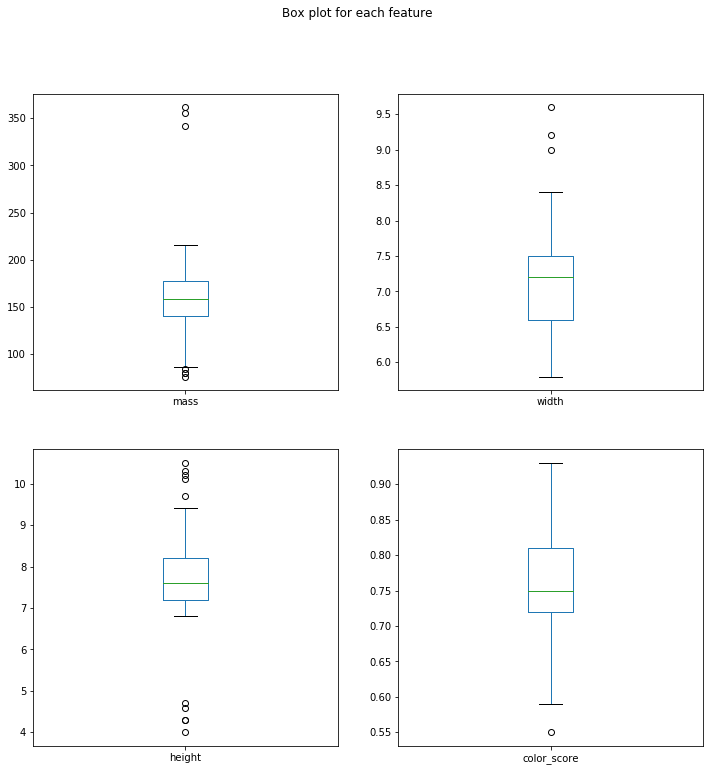

In [39]:
fruits_df.drop('fruit_label' , axis=1).plot(kind='box' ,
                                            subplots=True ,
                                            figsize = (12,12) ,
                                            layout=(2,2) ,
                                            sharex=False,
                                            sharey=False,
                                            title='Box plot for each feature')

By observing the BOX and Whisker Plots, it seems like color_score has near Gaussian Distribution

### Let's build a pair plot for all numeric features

In [40]:
columns_numeric = fruits_df.select_dtypes(include=[np.number]).columns.tolist()
columns_numeric

['fruit_label', 'mass', 'width', 'height', 'color_score']

<Figure size 432x288 with 0 Axes>

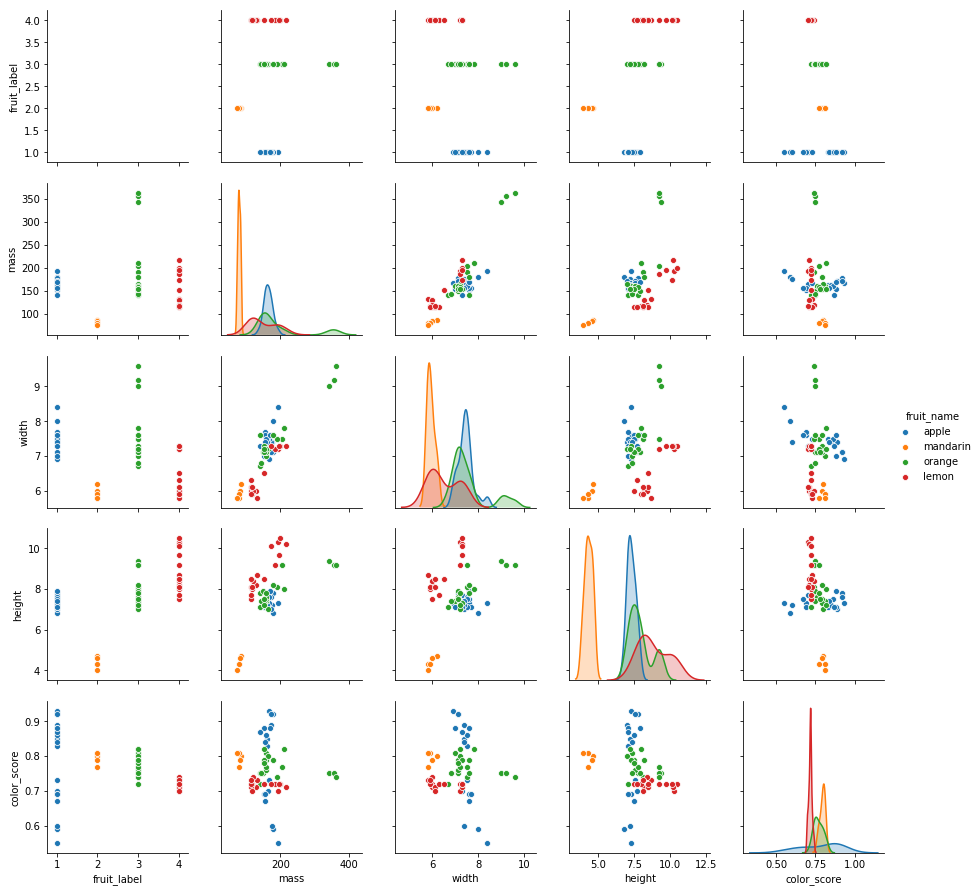

In [41]:
plt.figure()
sns.pairplot(data=fruits_df , hue='fruit_name' ,diag_kind= 'kde', vars = columns_numeric )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4924967B8>,
      dtype=object)

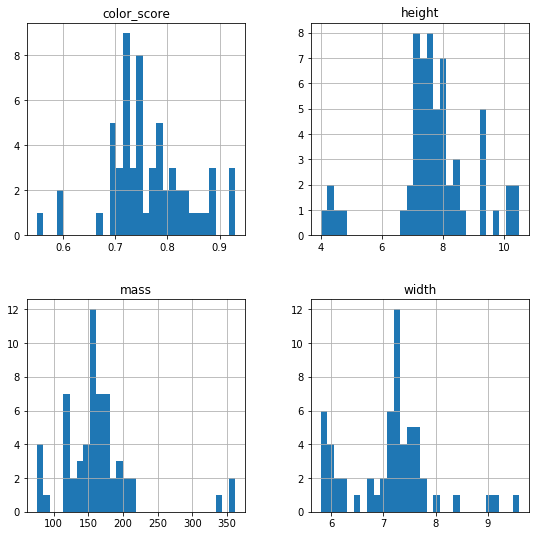

In [42]:
fruits_df.drop('fruit_label' ,axis= 1).hist(bins=30, figsize=(9,9))

In [43]:
fruits_df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


### The numeric values are not in scale, so some scaling is required

In [44]:
from sklearn.model_selection import train_test_split

X = fruits_df[columns_numeric].drop('fruit_label' ,axis= 1)
y = fruits_df.fruit_label

X_train , X_test , y_train , y_test = train_test_split( X , y ,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 4)
(15, 4)
(44,)
(15,)


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## We can now build different models and check the accuracy

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train ,y_train)

y_pred = logistic_regression_model.predict(X_test)

Text(0, 0.5, 'Predictions')

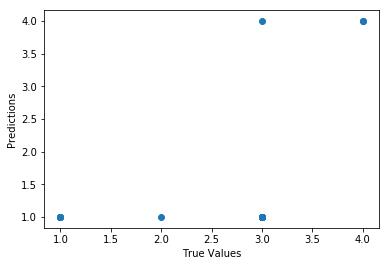

In [47]:
plt.scatter(y_test ,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('The accuracy of LinearRegressor Model is : {:,.2f} %'.format(accuracy_score(y_test ,y_pred)* 100))
print('Here\'s the classification report: ')
print(classification_report(y_test, y_pred))

The accuracy of LinearRegressor Model is : 40.00 %
Here's the classification report: 
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.67      1.00      0.80         2

   micro avg       0.40      0.40      0.40        15
   macro avg       0.25      0.50      0.33        15
weighted avg       0.18      0.40      0.24        15



Not the very best accuracy here

## Model Selection and Hyper Parameter Tuning

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

classifiers = [ DecisionTreeClassifier(),
                KNeighborsClassifier(),
                SVC(),
                GaussianNB(),
                QuadraticDiscriminantAnalysis(),
                RandomForestClassifier()]

classifier_names = []
accuracy_scores = []

for classifier in classifiers:
    classifier = classifier.fit(X_train ,y_train)
    y_pred = classifier.predict(X_test)
    
    classifier_names.append(classifier.__class__.__name__)
    accuracy_scores.append(round(accuracy_score(y_pred , y_test) * 100, 2 )  ) 
    
classifier_scores_df = pd.DataFrame({'model_name' : classifier_names ,
                                     'accuracy_score (%)' : accuracy_scores })
classifier_scores_df[['model_name','accuracy_score (%)']]


,model_name,accuracy_score (%)
0,DecisionTreeClassifier,86.67
1,KNeighborsClassifier,100.00
2,SVC,33.33
3,GaussianNB,66.67
4,QuadraticDiscriminantAnalysis,86.67
5,RandomForestClassifier,86.67


### Accuracy Visualization

[Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'QuadraticDiscriminantAnalysis'),
 Text(0, 0, 'RandomForestClassifier')]

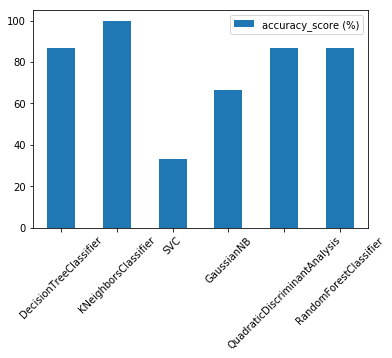

In [50]:
ax = classifier_scores_df.plot.bar()
ax.set_xticklabels(classifier_scores_df['model_name'] , rotation = 45)

The most accurate is the KNN model. So let's get the classificatioin report

In [51]:
predicted_values =  KNeighborsClassifier().fit(X_train, y_train).predict( X_test )

The classification report for KNN : 

In [52]:
print(classification_report(y_test , predicted_values))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test ,predicted_values))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]


### Let us now optimize the hyperparameters for RandomForesClassfier and K-NN models

In [58]:
from sklearn.model_selection import GridSearchCV
rfc_model = RandomForestClassifier()

params = {'criterion' : ['gini' , 'entropy'],
          'n_estimators' : [10 ,15 ,20 , 25 ,30 ],
          'min_samples_split' : [5 ,6, 7, 8, 9],
          'min_samples_leaf':[1,2,3],
          'random_state' : [123],
          'n_jobs' :[-1] }

tuned_rfc_model = GridSearchCV( rfc_model , param_grid= params , cv  = 10 ,n_jobs= -1 )

tuned_rfc_model.fit(X_train , y_train)
predictions = tuned_rfc_model.predict(X_test)

print('Accuracy after tuning RFC : {}'.format(accuracy_score(predictions , y_test)))
print('Best Hyper Parameters : {} '.format(tuned_rfc_model.best_params_))

Accuracy after tuning RFC : 0.8
Best Hyper Parameters : {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 123} 


In [55]:
knn_model = KNeighborsClassifier()

params = {'n_neighbors' : [5, 6, 7, 8, 9, 10],
    'weights' : [ 'uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree' , 'kd_tree' ,  'brute'],
    'leaf_size' : [1,2,3] }

tuned_knn = GridSearchCV(knn_model , param_grid=params , n_jobs=-1)
tuned_knn.fit(X_train , y_train)
predictions = tuned_knn.predict(X_test)

print('Accuracy after tuning RFC : {}'.format(accuracy_score(predictions , y_test)))
print('Best Hyper Parameters : {} '.format(tuned_knn.best_params_))

Accuracy after tuning RFC : 1.0
Best Hyper Parameters : {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'} 


([<matplotlib.axis.XTick at 0x1b492a955f8>,
 <a list of 5 Text xticklabel objects>)

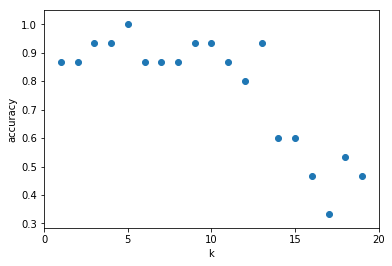

In [59]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## The highest accuracy for the K-NN model is achieved with 
- ### 'algorithm': 'auto'
- ### leaf_size': ## 1
- ### n_neighbors': 5
- ### weights': 'distance'
